Importing all the libraries we will be needing.

In [228]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## Reading Data

In [229]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Column customerID has all unique values and will not be contributing to our model much so lets drop it

In [230]:
data.drop(columns=['customerID'],inplace=True)

## Lets Explore Our Data More

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## We Dont have any null value. So, imputing is not required

## But We have Categoritical values which needs to be encoded for further processing.

## For that we will be using Label Encoder

In [232]:
le = LabelEncoder()
temp=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']
for i in temp:
  data[i] = le.fit_transform(data[i])
input = data.drop(columns='Churn')
target = data['Churn']


## Lets visually see our data

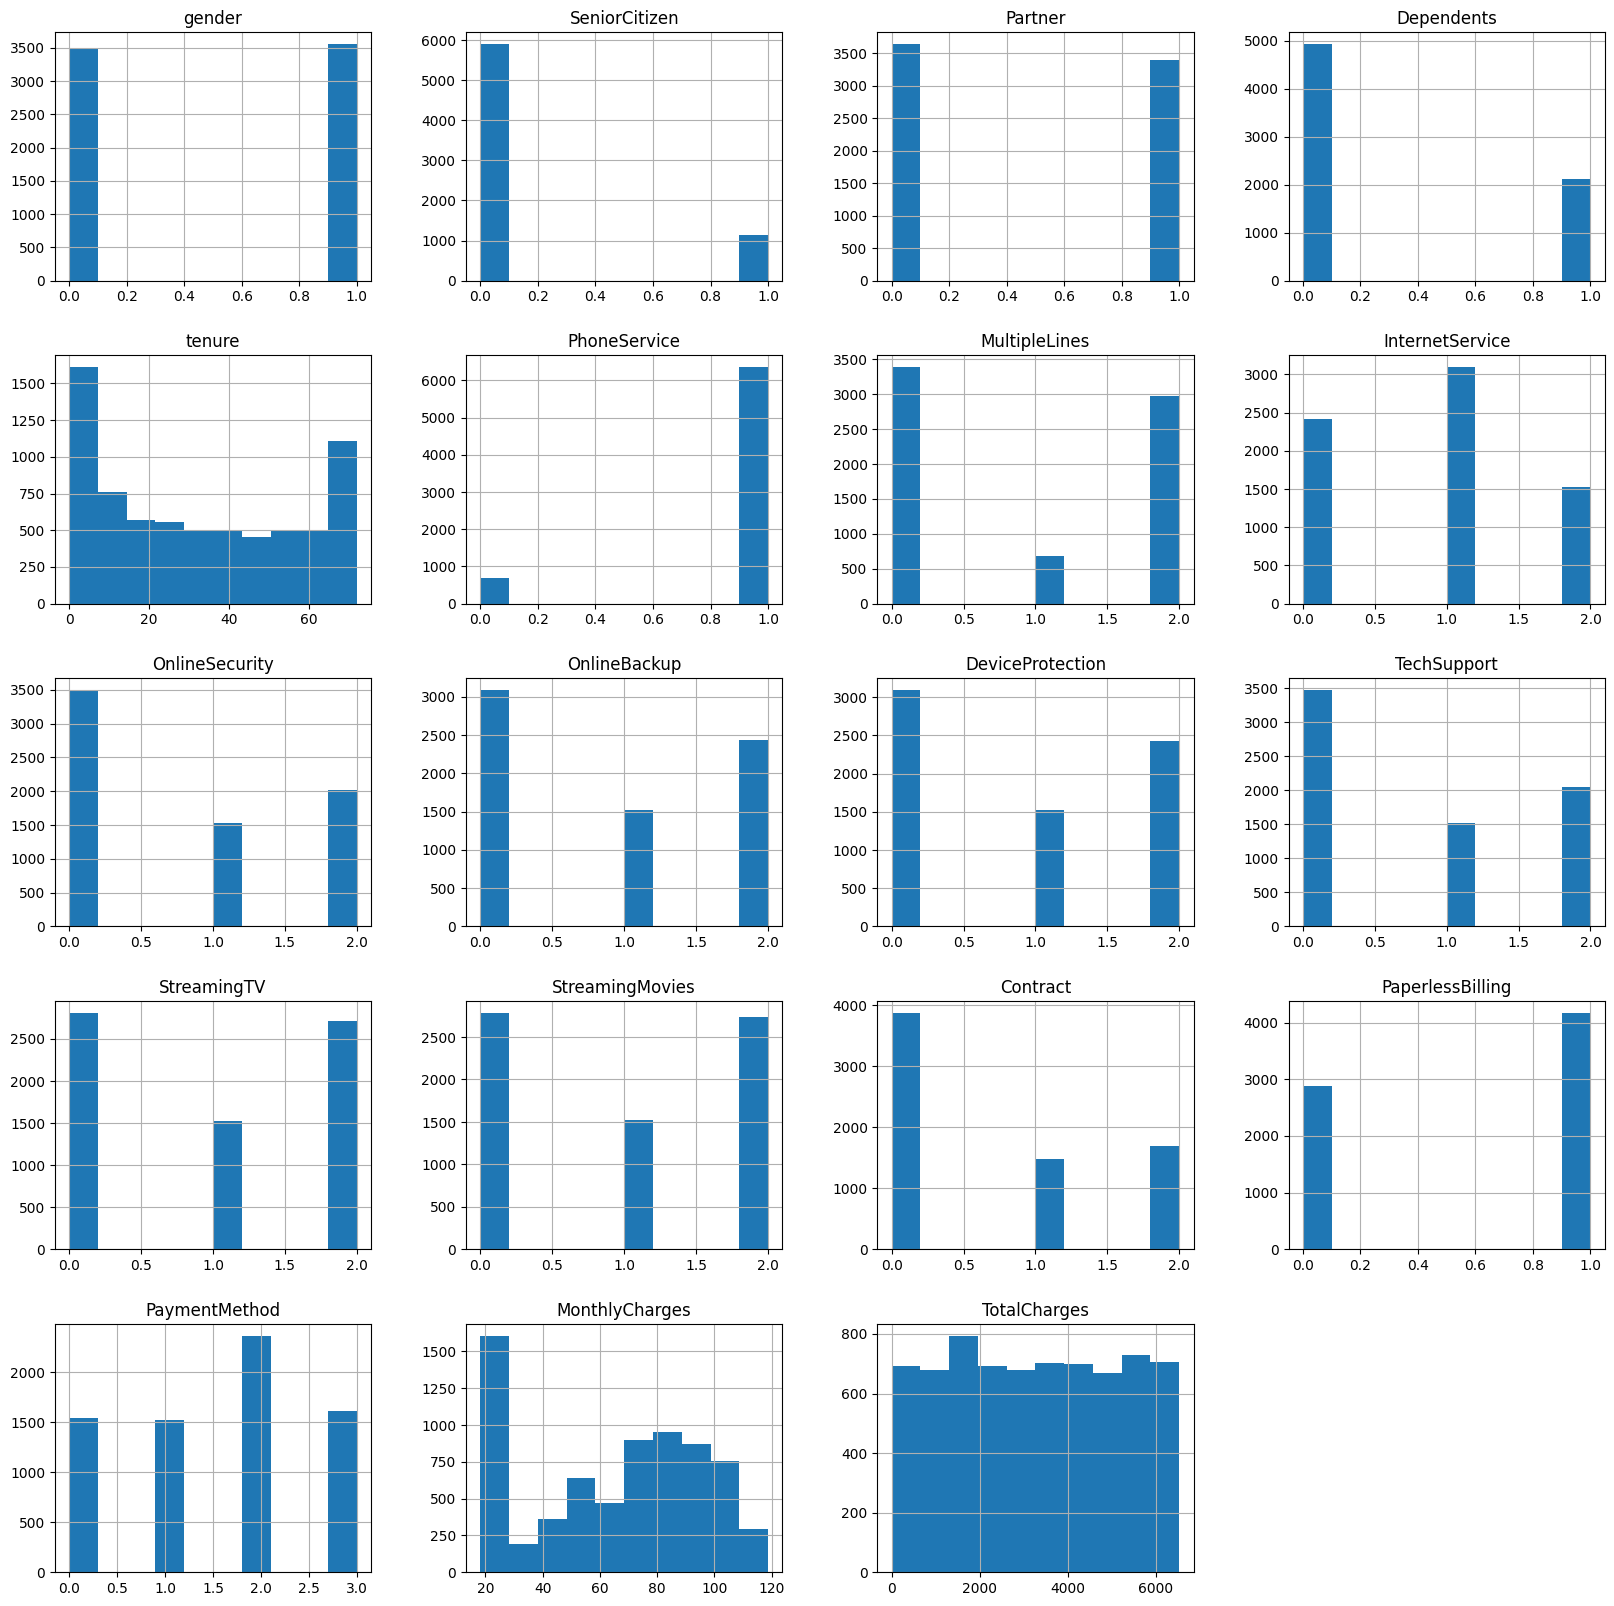

In [233]:
input.hist(figsize=(20, 20))
plt.show()

## Lets Divide the whole data into training and testing part

In [234]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.3,random_state=42)

## Lets Scale our Data using Standard Scaler

In [235]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Taking list to store the score for further visual representation

In [236]:
train_score=[]
test_score=[]
label1=[]

In [237]:
## Start Building our Models

##Perceptron

In [238]:
pc = Perceptron()
pc.fit(x_train, y_train)
y_pred = pc.predict(x_train)
y_pred = pc.predict(x_test)

## Score

In [239]:
print("Training accuracy:", accuracy_score(y_train, pc.predict(x_train)))
print("Testing accuracy:", accuracy_score(y_test, pc.predict(x_test)))
train_score.append(accuracy_score(y_train, pc.predict(x_train)))
test_score.append(accuracy_score(y_test, pc.predict(x_test)))
label1.append("Perceptron")

Training accuracy: 0.716024340770791
Testing accuracy: 0.7094178892569806


In [240]:
train_results=pc.predict(x_train)
confusion_matrix(y_train,train_results)

array([[2841,  794],
       [ 606,  689]])

In [241]:
precision_score(y_train,train_results)

0.4645987862440998

In [242]:
recall_score(y_train,train_results)

0.532046332046332

In [243]:
f1_score(y_train,train_results)

0.496040316774658

## Logistic Reg

In [244]:
lr=LogisticRegression()

In [245]:
lr.fit(x_train,y_train)

LogisticRegression()

In [246]:
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

## Score

In [247]:
train_score.append(accuracy_score(y_train,y_train_pred))
test_score.append(accuracy_score(y_test,y_test_pred))
label1.append("Logistic_reg")
accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)

(0.8042596348884381, 0.8078561287269286)

In [248]:
confusion_matrix(y_train,y_train_pred),confusion_matrix(y_test,y_test_pred)

(array([[3285,  350],
        [ 615,  680]]),
 array([[1395,  144],
        [ 262,  312]]))

In [249]:
precision_score(y_train,y_train_pred),precision_score(y_test,y_test_pred)

(0.6601941747572816, 0.6842105263157895)

In [250]:
recall_score(y_train,y_train_pred),recall_score(y_test,y_test_pred)

(0.525096525096525, 0.5435540069686411)

In [251]:
f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.5849462365591398, 0.6058252427184466)

## SVM

In [252]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [253]:
svc_train_pred=svc.predict(x_train)
svc_test_pred=svc.predict(x_test)

## Score

In [254]:
train_score.append(accuracy_score(y_train,svc_train_pred))
test_score.append(accuracy_score(y_test,svc_test_pred))
label1.append("SVM")
accuracy_score(y_train,svc_train_pred),accuracy_score(y_test,svc_test_pred)

(0.8196754563894524, 0.7979176526265973)

In [255]:
confusion_matrix(y_train,svc_train_pred),confusion_matrix(y_test,svc_test_pred)

(array([[3410,  225],
        [ 664,  631]]),
 array([[1423,  116],
        [ 311,  263]]))

In [256]:
precision_score(y_train,svc_train_pred),precision_score(y_test,svc_test_pred)

(0.7371495327102804, 0.6939313984168866)

In [257]:
recall_score(y_train,svc_train_pred),recall_score(y_test,svc_test_pred)

(0.48725868725868726, 0.45818815331010454)

In [258]:
f1_score(y_train,svc_train_pred),f1_score(y_test,svc_test_pred)

(0.5867038586703859, 0.5519412381951732)

## KNN

In [259]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [260]:
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)

## Score

In [261]:
train_score.append(accuracy_score(y_train,y_train_pred))
test_score.append(accuracy_score(y_test,y_test_pred))
label1.append("KNN")
accuracy_score(y_train_pred,y_train),accuracy_score(y_test_pred,y_test)

(0.8267748478701825, 0.7647893989588264)

In [262]:
confusion_matrix(y_train,y_train_pred),confusion_matrix(y_test,y_test_pred)

(array([[3273,  362],
        [ 492,  803]]),
 array([[1318,  221],
        [ 276,  298]]))

In [263]:
precision_score(y_train,y_train_pred),precision_score(y_test,y_test_pred)

(0.6892703862660944, 0.5741811175337187)

In [264]:
recall_score(y_train,y_train_pred),recall_score(y_test,y_test_pred)

(0.6200772200772201, 0.519163763066202)

In [265]:
f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.6528455284552845, 0.545288197621226)

## Decision Tree

In [266]:
#Gini
dtc=DecisionTreeClassifier(max_depth=5)

In [267]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [268]:
y_train_pred=dtc.predict(x_train)
y_test_pred=dtc.predict(x_test)

## Score

In [269]:
train_score.append(accuracy_score(y_train,y_train_pred))
test_score.append(accuracy_score(y_test,y_test_pred))
label1.append("Decision Tree(Gini)")
accuracy_score(y_train_pred,y_train),accuracy_score(y_test_pred,y_test)

(0.7973630831643002, 0.7856128726928537)

In [270]:
confusion_matrix(y_train_pred,y_train),confusion_matrix(y_test_pred,y_test)

(array([[3343,  707],
        [ 292,  588]]),
 array([[1411,  325],
        [ 128,  249]]))

In [271]:
precision_score(y_train_pred,y_train),precision_score(y_test_pred,y_test)

(0.4540540540540541, 0.4337979094076655)

In [272]:
recall_score(y_train_pred,y_train),recall_score(y_test_pred,y_test)

(0.6681818181818182, 0.6604774535809018)

In [273]:
f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.5406896551724137, 0.5236593059936908)

## Decison Tree 2

In [274]:
#ID3
dtc_2=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [275]:
dtc_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [276]:
y_train_pred=dtc_2.predict(x_train)
y_test_pred=dtc_2.predict(x_test)

##Score

In [277]:
train_score.append(accuracy_score(y_train,y_train_pred))
test_score.append(accuracy_score(y_test,y_test_pred))
label1.append("Decision Tree(entropy)")
accuracy_score(y_train_pred,y_train),accuracy_score(y_test_pred,y_test)

(0.7963488843813388, 0.7865593942262187)

In [278]:
confusion_matrix(y_train,y_train_pred),confusion_matrix(y_test,y_test_pred)

(array([[3344,  291],
        [ 713,  582]]),
 array([[1413,  126],
        [ 325,  249]]))

In [279]:
precision_score(y_train,y_train_pred),precision_score(y_test,y_test_pred)

(0.6666666666666666, 0.664)

In [280]:
f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.53690036900369, 0.5247629083245522)

In [281]:
recall_score(y_train,y_train_pred),recall_score(y_test,y_test_pred)

(0.4494208494208494, 0.4337979094076655)

## Naive Bayes

In [282]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [283]:
nb_y_train_pred=nb.predict(x_train)
nb_y_test_pred=nb.predict(x_test)

## Score

In [284]:
train_score.append(accuracy_score(nb_y_train_pred,y_train))
test_score.append(accuracy_score(nb_y_test_pred,y_test))
label1.append("Naive Bayes")
accuracy_score(nb_y_train_pred,y_train),accuracy_score(nb_y_test_pred,y_test)

(0.7537525354969574, 0.7557974443918599)

In [285]:
confusion_matrix(y_train,nb_y_train_pred),confusion_matrix(y_test,nb_y_test_pred)

(array([[2777,  858],
        [ 356,  939]]),
 array([[1164,  375],
        [ 141,  433]]))

In [286]:
precision_score(y_train,nb_y_train_pred),precision_score(y_test,nb_y_test_pred)

(0.5225375626043406, 0.5358910891089109)

In [287]:
f1_score(y_train,nb_y_train_pred),f1_score(y_test,nb_y_test_pred)

(0.6073738680465718, 0.6266280752532563)

In [288]:
recall_score(y_train,nb_y_train_pred),recall_score(y_test,nb_y_test_pred)

(0.7250965250965251, 0.7543554006968641)

## Random Forest

In [291]:
parameter={"n_estimators":[10,20,30,50,80,100],
           "min_samples_split":[5,6,7,8,9,10],
           "max_depth":[5,6,7,8,9,10]}

In [292]:
rf=RandomForestClassifier(random_state=42)
gs=GridSearchCV(rf,parameter,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 50, 80, 100]})

In [293]:
best_rf = gs.best_estimator_
y_train_pred=best_rf.predict(x_train)
y_test_pred=best_rf.predict(x_test)

## Score

In [294]:
train_score.append(accuracy_score(y_train,y_train_pred))
test_score.append(accuracy_score(y_test,y_test_pred))
label1.append("Random Forest")
accuracy_score(y_train_pred,y_train),accuracy_score(y_test_pred,y_test)

(0.813184584178499, 0.7969711310932324)

In [295]:
confusion_matrix(y_train,y_train_pred),confusion_matrix(y_test,y_test_pred)

(array([[3378,  257],
        [ 664,  631]]),
 array([[1421,  118],
        [ 311,  263]]))

In [296]:
precision_score(y_train,y_train_pred),precision_score(y_test,y_test_pred)

(0.7105855855855856, 0.6902887139107612)

In [297]:
recall_score(y_train,y_train_pred),recall_score(y_test,y_test_pred)

(0.48725868725868726, 0.45818815331010454)

In [298]:
f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)

(0.5781035272560697, 0.5507853403141361)

In [299]:
## Lets visualize our score

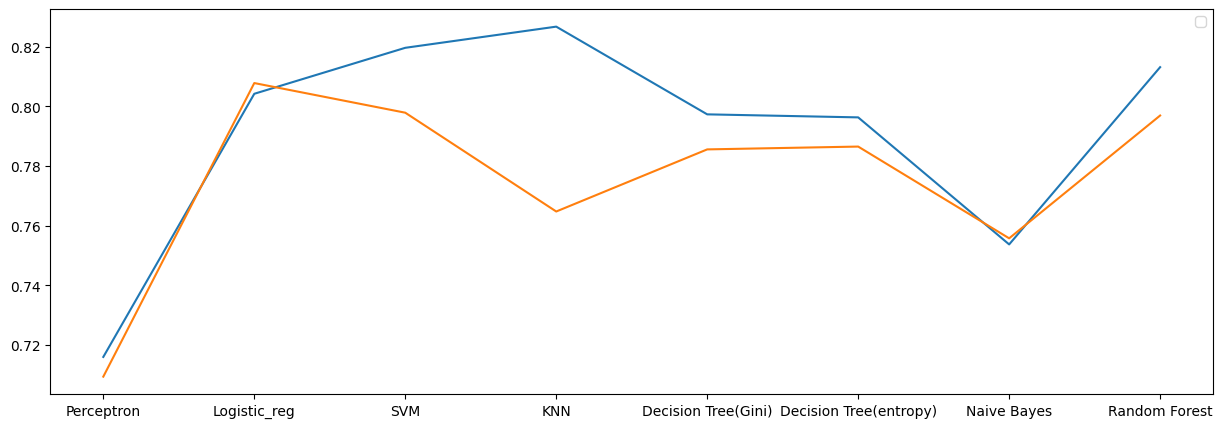

In [300]:
plt.figure(figsize=(15,5))
plt.plot(label1,train_score)
plt.plot(label1,test_score)
plt.legend()